# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://home.openweathermap.org/api_keys"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
City not found. Skipping...
Processing Record 2 of Set 1 | klyuchi
City not found. Skipping...
Processing Record 3 of Set 1 | brak
City not found. Skipping...
Processing Record 4 of Set 1 | aykhal
City not found. Skipping...
Processing Record 5 of Set 1 | novaya mayna
City not found. Skipping...
Processing Record 6 of Set 1 | tiksi
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 9 of Set 1 | tofol
City not found. Skipping...
Processing Record 10 of Set 1 | sitka
City not found. Skipping...
Processing Record 11 of Set 1 | baharly
City not found. Skipping...
Processing Record 12 of Set 1 | wailua homesteads
City not found. Skipping...
Processing Record 13 of Set 1 | puerto armuelles
City not found. Skipping...
Processing Record 1

City not found. Skipping...
Processing Record 17 of Set 3 | nizhneangarsk
City not found. Skipping...
Processing Record 18 of Set 3 | karratha
City not found. Skipping...
Processing Record 19 of Set 3 | khandyga
City not found. Skipping...
Processing Record 20 of Set 3 | badger
City not found. Skipping...
Processing Record 21 of Set 3 | iskateley
City not found. Skipping...
Processing Record 22 of Set 3 | ghardaia
City not found. Skipping...
Processing Record 23 of Set 3 | hobyo
City not found. Skipping...
Processing Record 24 of Set 3 | haiku-pauwela
City not found. Skipping...
Processing Record 25 of Set 3 | morristown
City not found. Skipping...
Processing Record 26 of Set 3 | uige
City not found. Skipping...
Processing Record 27 of Set 3 | saipan
City not found. Skipping...
Processing Record 28 of Set 3 | sur
City not found. Skipping...
Processing Record 29 of Set 3 | necochea
City not found. Skipping...
Processing Record 30 of Set 3 | nemuro
City not found. Skipping...
Processing 

City not found. Skipping...
Processing Record 35 of Set 5 | nieuw amsterdam
City not found. Skipping...
Processing Record 36 of Set 5 | kaa-khem
City not found. Skipping...
Processing Record 37 of Set 5 | gorom-gorom
City not found. Skipping...
Processing Record 38 of Set 5 | kudahuvadhoo
City not found. Skipping...
Processing Record 39 of Set 5 | vila franca do campo
City not found. Skipping...
Processing Record 40 of Set 5 | alampur
City not found. Skipping...
Processing Record 41 of Set 5 | weno
City not found. Skipping...
Processing Record 42 of Set 5 | sittwe
City not found. Skipping...
Processing Record 43 of Set 5 | palpa
City not found. Skipping...
Processing Record 44 of Set 5 | saint-pierre
City not found. Skipping...
Processing Record 45 of Set 5 | lycksele
City not found. Skipping...
Processing Record 46 of Set 5 | ponta delgada
City not found. Skipping...
Processing Record 47 of Set 5 | san ignacio
City not found. Skipping...
Processing Record 48 of Set 5 | guarapari
City 

City not found. Skipping...
Processing Record 3 of Set 8 | greymouth
City not found. Skipping...
Processing Record 4 of Set 8 | ciudad lazaro cardenas
City not found. Skipping...
Processing Record 5 of Set 8 | al ghayzah
City not found. Skipping...
Processing Record 6 of Set 8 | penzance
City not found. Skipping...
Processing Record 7 of Set 8 | bardai
City not found. Skipping...
Processing Record 8 of Set 8 | abepura
City not found. Skipping...
Processing Record 9 of Set 8 | mount pearl
City not found. Skipping...
Processing Record 10 of Set 8 | san jose
City not found. Skipping...
Processing Record 11 of Set 8 | emerald
City not found. Skipping...
Processing Record 12 of Set 8 | santa uxia de ribeira
City not found. Skipping...
Processing Record 13 of Set 8 | papao
City not found. Skipping...
Processing Record 14 of Set 8 | lethem
City not found. Skipping...
Processing Record 15 of Set 8 | geroskipou
City not found. Skipping...
Processing Record 16 of Set 8 | fort mcmurray
City not f

City not found. Skipping...
Processing Record 21 of Set 10 | nsanje
City not found. Skipping...
Processing Record 22 of Set 10 | samalkha
City not found. Skipping...
Processing Record 23 of Set 10 | battagram
City not found. Skipping...
Processing Record 24 of Set 10 | alofi
City not found. Skipping...
Processing Record 25 of Set 10 | malango
City not found. Skipping...
Processing Record 26 of Set 10 | howrah
City not found. Skipping...
Processing Record 27 of Set 10 | iguape
City not found. Skipping...
Processing Record 28 of Set 10 | batang
City not found. Skipping...
Processing Record 29 of Set 10 | gudauri
City not found. Skipping...
Processing Record 30 of Set 10 | maumere
City not found. Skipping...
Processing Record 31 of Set 10 | elmendorf air force base
City not found. Skipping...
Processing Record 32 of Set 10 | sydney
City not found. Skipping...
Processing Record 33 of Set 10 | carpina
City not found. Skipping...
Processing Record 34 of Set 10 | ancud
City not found. Skippin

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'output_data'

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

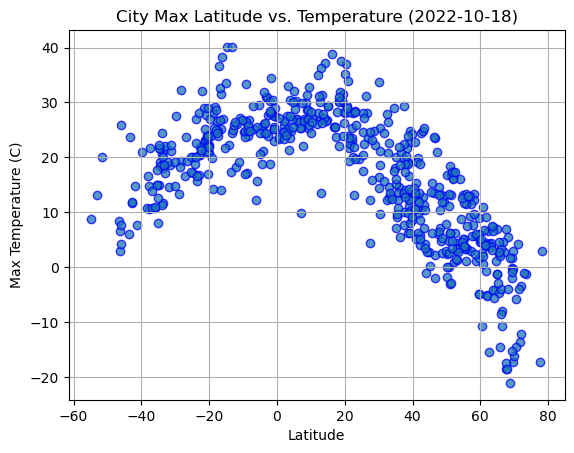

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

<Figure size 640x480 with 0 Axes>

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker ='o', edgecolors='blue', alpha=.75)

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

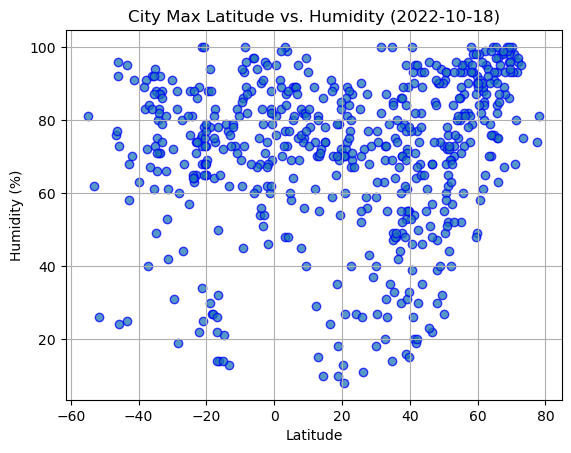

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

<Figure size 640x480 with 0 Axes>

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker ='o', edgecolors='blue', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.grid(True)
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

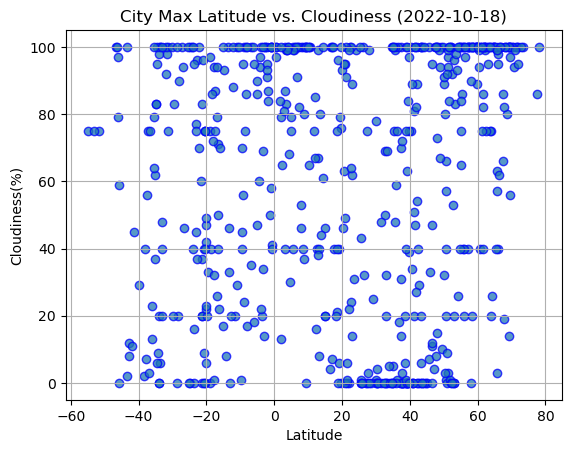

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

<Figure size 640x480 with 0 Axes>

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', edgecolors='blue', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Max Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

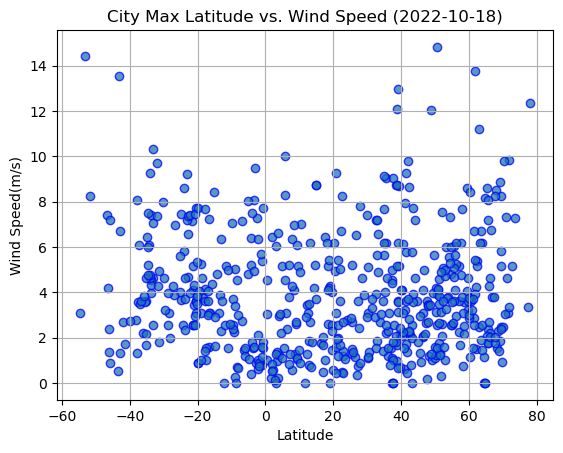

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

<Figure size 640x480 with 0 Axes>

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker ='o', edgecolors='blue', alpha=.75)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)
plt.show()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
import scipy.stats as st

def linear_regression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_equation

def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b), fontsize=15,color="red")

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.85


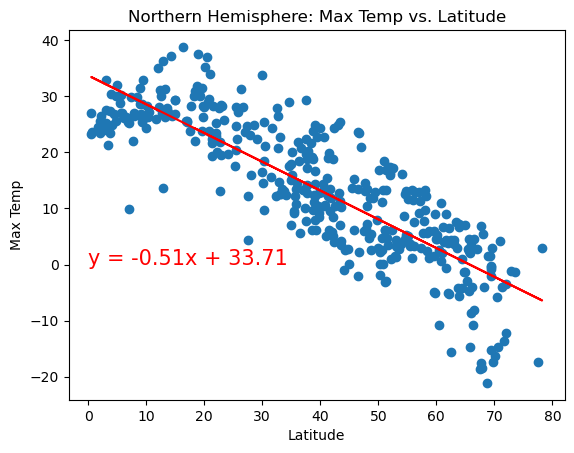

In [36]:
# Linear regression on Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Max Temp vs. Latitude")
plt.show()

The r-value is : 0.64


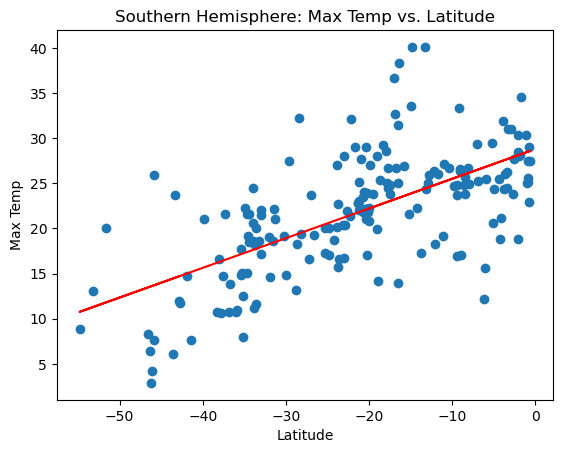

In [37]:
# Linear regression on Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Max Temp vs. Latitude")
plt.show()

**Discussion about the linear relationship:** The further north, the colder it gets, further south is hotter

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.24


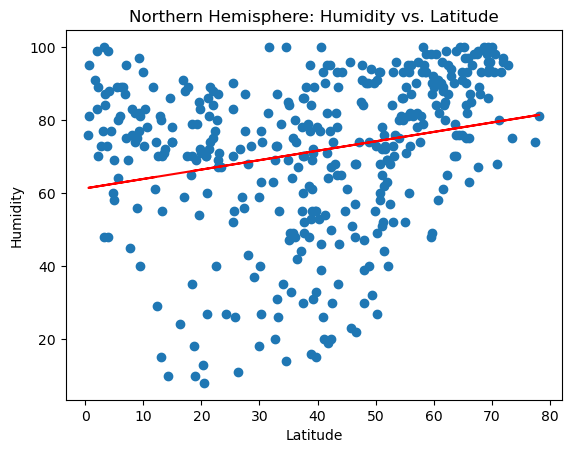

In [38]:
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.show()

The r-value is : 0.02


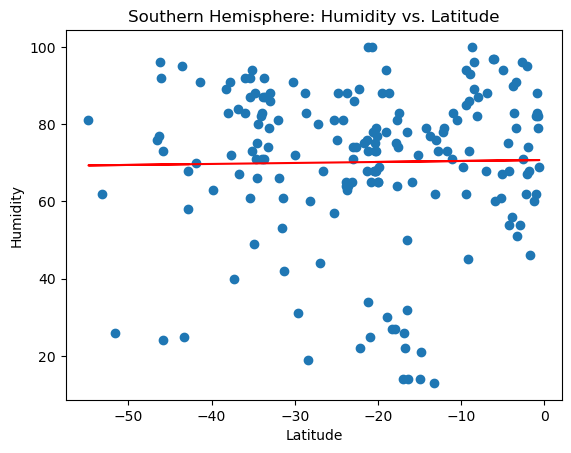

In [39]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.show()

**Discussion about the linear relationship:** there is a slight increase to the humidity in the north, but vurtually no change in the south

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.16


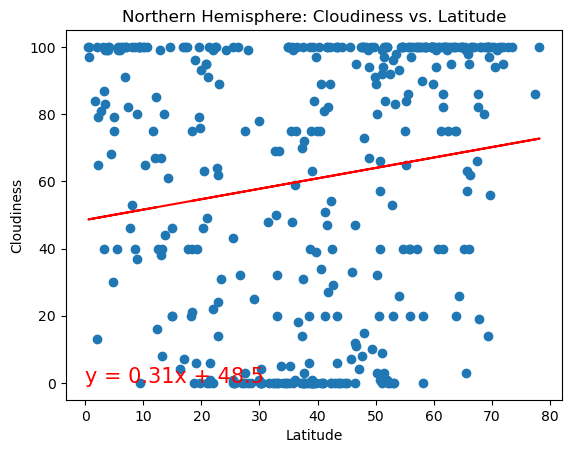

In [40]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.show()

The r-value is : 0.14


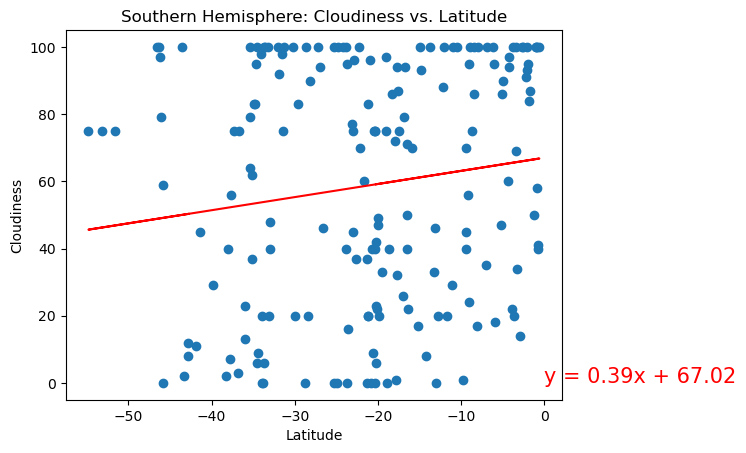

In [41]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.show()

**Discussion about the linear relationship:** the clouds are unchanged by the hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.17


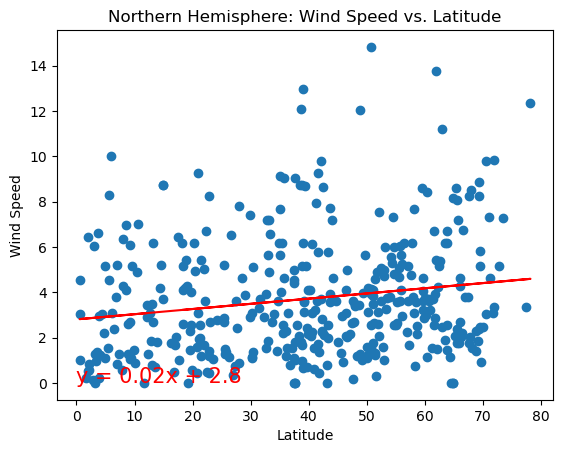

In [45]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.show()

The r-value is : -0.25


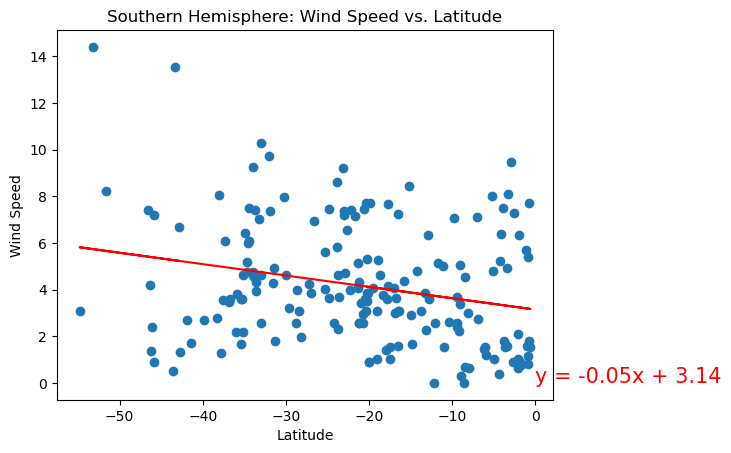

In [46]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.show()

**Discussion about the linear relationship:** the windspeed is higher near the equater